## House Price Prediction Problem
This notebook deals the problem of predicting the value of a house given a series of characteristics. This is a relatively simple regression problem (that is the the target variable is continuous). 
 
The dataset is available on DeepNote (the same place where this notebook is hosted). 

A description of the dataset is provided in `housedata_description.txt`. 

In [2]:
import pandas as pd
import os
pd.options.display.max_columns = None

In [3]:
house = pd.read_csv("House_price.csv")

In [4]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [50]:
house.shape

(1460, 79)

## Data work

We have 80 variables that can potentially be used to construct a prediction models. The 81st variable is `SalePrice` which is the target price. 

We will assign the target to `Y` and we will drop it from the DataFrame.    

In [5]:
Y=house['SalePrice']
house = house.drop(["Id", "SalePrice"], axis=1)

We will start with a very simple model that only consider the continous variable. We will deal with the cathegorical later on. 

A way to select the variable that are continous is to use `select_dtypes` which select (or deselect) variables of a certain type. We will select only the variables that are of type 

In [6]:
house_cont = house.select_dtypes(include='number')
house_cat = house.select_dtypes(exclude=["number"])

In [7]:
house_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Missing Values

There are several variables that have missing values, e.g. `LeftFrontage` and `MasVnrArea`. We have two choices: (i) we drop the variables; (ii) we try to replace the missing values with something that makes sense. 

   

In [53]:
#Let's check if the data set has any missing values.   #kaggle
house.columns[house.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [54]:
house_cont.loc[:, house_cont.isnull().any()]

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [9]:
house_cat.loc[:, house_cat.isnull().any()]

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,NaN,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,NaN,None,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,NaN,None,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


#### Imputing continuous variables

We will start by using `SimpleImputer` which imputes the median (or the mean) to the missing values (for continuous variables)

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(house_cont)
X = imp.transform(house_cont)
house_cont_imp = pd.DataFrame(X, columns=house_cont.columns)


`house_cont_imp` contains the data with the missing replaced with the median. 



#### Imputing discrete variables

First of all, there are many variables that have more than 50% of missing values. We will drop those

In [11]:
house_cat.isnull().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

In [12]:
house_cat.columns[house_cat.isnull().mean() > 0.4]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [13]:
house_cat = house_cat[house_cat.columns[house_cat.isnull().mean() < 0.4]]

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(house_cat)
X_cat = imp.transform(house_cat)
house_cat_imp = pd.DataFrame(X_cat, columns=house_cat.columns)


In many algorithms, categorical variables need to OneHotEncoded. There are many ways to do this. The easiest is to use Pandas.

In [15]:
X_cat_nodummy = house_cat_imp.values
house_cat_imp = pd.get_dummies(house_cat_imp)
X_cat = house_cat_imp.values


## Train and Test
We split the resulting dataset into train and test. We will set aside test to verify how the algorithms we will try are performing. The test data will not take part top any cross-validation exercise and will be used to perform an expost assesment. 

We will create two matrix `X` (continous)  `X_cat` (categorical in dummy form), and `X_cat_nodummy` (categorical no dummy format).


In [16]:
from sklearn.model_selection import train_test_split
X_cont_train, X_cont_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=765)
X_cat_train, X_cat_test, Y_train, Y_test = train_test_split(X_cat, Y, test_size=0.25, random_state=765)
X_cat_nodummy_train, X_cat_nodummy_test, Y_train, Y_test = train_test_split(X_cat_nodummy, Y, test_size=0.25, random_state=765)

In [17]:
#from sklearn.preprocessing import KBinsDiscretizer
#est = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='quantile')
#XX = est.fit(X_cont_train) ## Careful this transforms the whole X_train into bins ... shou;d do it only for vars with outliers
#XX.transform(X_cont_train)
#XX.transform(X_cont_test)


## Linear Model
We start with a simple linear model

In [18]:
from sklearn.linear_model import LinearRegression
reg_cont = LinearRegression().fit(X_cont_train, Y_train)
reg_cat = LinearRegression().fit(X_cat_train, Y_train)

Once the model has been fit, we can start by getting the "in sample" performances of the model. In other words, we measure the performances, measured by the $R^2$ on the training data


In [19]:
reg_cont.score(X_cont_train,Y_train) ## Return the R2 of the regression

0.7970784777217548

In [20]:
reg_cat.score(X_cat_train,Y_train) ## Return the R2 of the regression

0.8495745882463592

The $R^2$ is about 80% which is pretty good. Of course, *over-fitting* is around the corner so we need to see whether the performances of the model hold on "new data". Before measuring the performances of the model on the test model that we have set aside, we can estimate the performances of the mdoel iusing cross-validation

In [21]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(reg_cont, X_cont_train, Y_train, cv=10, scoring=('r2', 'neg_mean_squared_error'))
cv_results_cat = cross_validate(reg_cat, X_cat_train, Y_train, cv=5, scoring=('r2', 'neg_mean_squared_error'))
cv_results


{'fit_time': array([0.00725245, 0.00823355, 0.00273275, 0.0033474 , 0.00232768,
        0.00199389, 0.00265121, 0.00870252, 0.0407052 , 0.00528121]),
 'score_time': array([0.        , 0.00199485, 0.00207734, 0.00099659, 0.00210524,
        0.00428462, 0.        , 0.00184059, 0.00199389, 0.00179696]),
 'test_r2': array([0.75469443, 0.85817907, 0.66361859, 0.85551474, 0.8419855 ,
        0.85165041, 0.56789401, 0.85342334, 0.85256481, 0.23701326]),
 'test_neg_mean_squared_error': array([-2.29770613e+09, -9.53627877e+08, -3.28365136e+09, -6.97520529e+08,
        -6.58480560e+08, -4.72414771e+08, -1.84666047e+09, -1.13210234e+09,
        -6.37817947e+08, -5.17760756e+09])}

The average cross-validated Mean Squared is

In [22]:
mmse = np.mean(cv_results["test_r2"])
sdmse = np.std(cv_results["test_r2"])
cvmse = sdmse/mmse
print("(Continous) Average MSE=%s SD MSE=%s CV=%s" % (mmse, sdmse, cvmse))


mmse = np.mean(cv_results_cat["test_r2"])
sdmse = np.std(cv_results_cat["test_r2"])
cvmse = sdmse/mmse
print("(Categorical) Average MSE=%s SD MSE=%s CV=%s" % (mmse, sdmse, cvmse))

(Continous) Average MSE=0.7336538145608176 SD MSE=0.1907815321394877 CV=0.2600429907853665
(Categorical) Average MSE=-4.528563767076705e+22 SD MSE=7.232504272807829e+22 CV=-1.5970856644195124


There is a big variance in the cross-validated performances: in one of the fold the performances of the model is very poor with an instance in which the $R^2$ is much lower than that obtained by the remaineder of the folds. This means that should be wary of getting the score on the test dataset as a good indicator of performances. Although the $R^2$ on the test is 

In [23]:
reg_cont.score(X_cont_test, Y_test)

0.845284242726472

we cannot reasonalbly esclude that we get this high value by chance. Rememebr that we are only using a subset of the available predictors. It is very likely that we are predicting very well many prices but we are making big mistakes on same sales --- the hope is that these errors can be addressed by a richer set of predictors. 

Before considering more predictors, we will start by considering other models. We will start with Lasso and Ridge. Now, ex-ante there is no great reason to believe that the model would improve much using this methods. The amount of overfitting is relatively limited   (compare the cross validate scores and the training scores) and thus regularization is not going to make a big difference. But small differences are important too, so we will try these models anyway 

### Lasso and Ridge

We are now going to consider the penalized (regularized problem)
$$
\min_{\beta} \sum_{i=1}^n (Y_i - X_i\beta)^2 +  \alpha \sum_{j=1}^p |\beta_j|^s
$$
where $s=2$ for Ridge and $s=1$ for Lasso. To implement Ridge and Lasso we need to choose a value for $\alpha$. This can be done by cross validation, that is, by choosing a value that gives the best crossvalidated score. But befere proceeding there is an important aspect that have to be considered. Regularization requires that the features (the columns of X) are scaled, i.e., they have mean zero and unary variance. If the features are left unscaled the constraint will bind for certain parameters and not for others. 

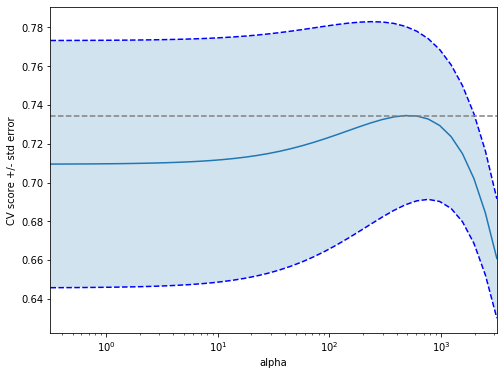

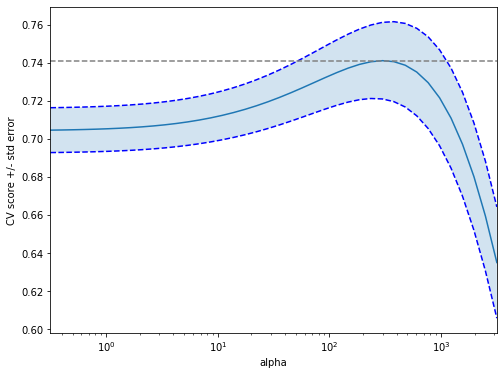

In [25]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, RobustScaler

## Scale data - 


## Continous
## This is difficult here - the data have outliers, have different distributions
scaler = StandardScaler().fit(X_cont_train)
X_scaled_cont_train = scaler.transform(X_cont_train)
X_scaled_cont_test = scaler.transform(X_cont_test)


## Dummy
## Problems....but I will scale it anyway
scaler_cat = StandardScaler().fit(X_cat_train)
X_scaled_cat_train = scaler_cat.transform(X_cat_train)
X_scaled_cat_test = scaler_cat.transform(X_cat_test)

alphas = np.logspace(-.5, 3.5, 40)  ### exp(-.1) to exp(6.5) (by 40)

tuned_parms = [{'alpha': alphas}]
n_folds = 5

ridge = Ridge(random_state=12345, max_iter=130000)

clf = GridSearchCV(ridge, tuned_parms, cv=n_folds, refit=False)
clf.fit(X_scaled_cont_train, Y_train)

clf_cat = GridSearchCV(ridge, tuned_parms, cv=n_folds, refit=False)
clf_cat.fit(X_scaled_cat_train, Y_train)

## First plot (continous)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]]);

## Second plot (dummy)

scores = clf_cat.cv_results_['mean_test_score']
scores_std = clf_cat.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]]);

The $\alpha$ with the lowest average score is between $10^2$ and $10^3$. More precisely

In [26]:
print("Best parameter alpha (continous):%s, associated scores=%s" % (clf.best_params_['alpha'], clf.best_score_))

Best parameter alpha (continous):478.06525330073805, associated scores=0.7345434177296168


In [27]:
print("Best parameter alpha (dummy):%s, associated scores=%s" % (clf_cat.best_params_['alpha'], clf_cat.best_score_))

Best parameter alpha (dummy):298.09793965647276, associated scores=0.7410310239729365


#### Re-train the model 

Notice the difference between the parameters of Ridge and those from a simple linear regression

In [28]:
ridge_cont = Ridge(alpha=clf.best_params_['alpha'])
ridge_cont.fit(X_scaled_cont_train, Y_train)

ridge_cat = Ridge(alpha=clf_cat.best_params_['alpha'])
ridge_cat.fit(X_scaled_cat_train, Y_train)

print("Test scores: (Continous only): %s - (Dummy only): %s" % (ridge_cont.score(X_scaled_cont_test, Y_test), ridge_cat.score(X_scaled_cat_test, Y_test)))

Test scores: (Continous only): 0.8310904046957918 - (Dummy only): 0.7824177754160616


In [29]:
reg_cont.coef_

array([-2.03925017e+02, -6.56833343e+01,  3.19037006e-01,  1.85516914e+04,
        5.32383655e+03,  2.22643204e+02,  1.32974238e+02,  2.64251714e+01,
        7.19862307e+00,  3.89056117e+00, -1.28182799e+00,  9.80735625e+00,
        1.01860033e+01,  1.00405756e+01,  1.07154649e+01,  3.09420438e+01,
        8.24216072e+03,  8.05949110e+02,  9.01082138e+03, -1.76934240e+03,
       -1.02418425e+04, -1.17745744e+04,  5.82574727e+03,  4.77016671e+03,
        1.42588808e+02,  1.18772033e+04, -3.94433531e+00,  1.87344930e+01,
       -2.31457017e+01,  5.00284160e+00,  2.16429437e+01,  6.00057109e+01,
       -1.25292145e+01, -6.43397963e-01, -2.24733661e+02, -1.05937017e+03])

The reason that they are so different is that the regression was estimated on data that were not scaled. As a result the magnitude of the coefficients greatly differs. If we re-estimate the coeffieicnts of the linear model on scaled data we will see that the differences will be more modest and, more interestingly, the Ridge coefficients are all smaller (in absolute value) as expected given the $L^2$ penalization

In [30]:
reg_scaled_cont = LinearRegression().fit(X_scaled_cont_train, Y_train)
reg_scaled_cont.coef_

array([-8.67721060e+03, -1.31607180e+03,  3.43154790e+03,  2.55293434e+04,
        5.84992941e+03,  6.56818066e+03,  2.80583785e+03,  4.63950855e+03,
        9.33375304e+16,  3.38104843e+16,  8.82738523e+16, -9.14200269e+16,
        7.99894911e+16,  8.72544893e+16,  9.81067971e+15, -1.07350056e+17,
        4.23146126e+03,  1.38933028e+02,  4.92394979e+03, -8.23215320e+02,
       -8.22678657e+03, -2.61453654e+03,  9.50240354e+03,  3.08524009e+03,
        3.34929304e+03,  8.85938348e+03, -7.91335295e+02,  2.30873584e+03,
       -1.50211517e+03,  3.02131275e+02,  5.56762253e+02,  3.16442223e+03,
       -5.90347142e+02, -3.56104807e+02, -6.01561965e+02, -1.44835815e+03])

Note: using scaled predictors does change the magnitude of the coefficients, but it does not change in any way the predictions and thus the score of the model (up to a small approximation error)

In [31]:
reg_scaled_cont.score(X_scaled_cont_train, Y_train) - reg_cont.score(X_cont_train, Y_train)

8.507178024352857e-05

To calculate the score on the test data we have to apply the same scaling to the data:

In [32]:
ridge_cont.score(X_scaled_cont_test, Y_test)

0.8310904046957918

In [34]:
ridge_cat.score(X_scaled_cat_test, Y_test)

0.7824177754160616

As we were expecting Ridge does not seem to improve much the performance of the model on the test. 

### Question: What happens if we use Lasso instead of Ridge?

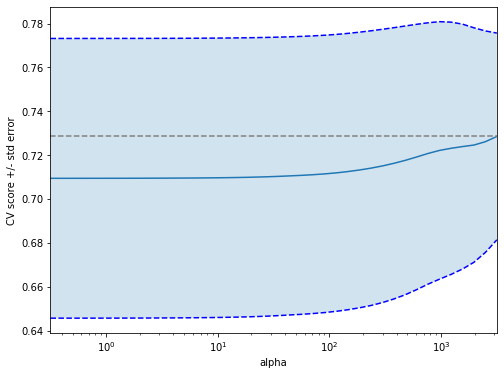

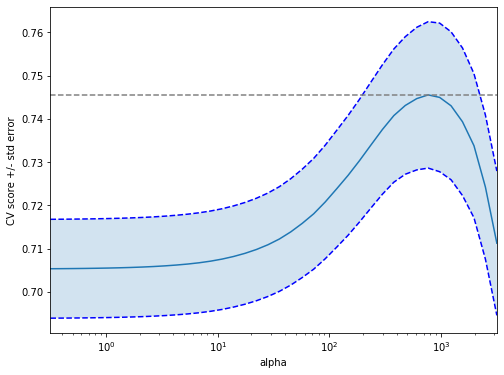

In [33]:
alphas = np.logspace(-.5, 3.5, 40)  ### exp(-.1) to exp(6.5) (by 40)
tuned_parms = [{'alpha': alphas}]
n_folds = 5

lasso = Lasso(random_state=12345, max_iter=130000)

clf_lasso = GridSearchCV(lasso, tuned_parms, cv=n_folds, refit=False)
clf_lasso.fit(X_scaled_cont_train, Y_train)

clf_cat_lasso = GridSearchCV(lasso, tuned_parms, cv=n_folds, refit=False)
clf_cat_lasso.fit(X_scaled_cat_train, Y_train)

## First plot (continous)
scores = clf_lasso.cv_results_['mean_test_score']
scores_std = clf_lasso.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]]);

## Second plot (dummy)

scores = clf_cat_lasso.cv_results_['mean_test_score']
scores_std = clf_cat_lasso.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]]);

In [35]:
print("Best parameter alpha (continous):%s, associated scores=%s" % (clf_lasso.best_params_['alpha'], clf_lasso.best_score_))

Best parameter alpha (continous):3162.2776601683795, associated scores=0.7285411049461017


In [36]:
print("Best parameter alpha (dummy):%s, associated scores=%s" % (clf_cat_lasso.best_params_['alpha'], clf_cat_lasso.best_score_))

Best parameter alpha (dummy):766.6822074546214, associated scores=0.7455668397019954


In [37]:
lasso_cont = Lasso(alpha=clf_lasso.best_params_['alpha'])
lasso_cont.fit(X_scaled_cont_train, Y_train)

lasso_cat = Lasso(alpha=clf_cat_lasso.best_params_['alpha'])
lasso_cat.fit(X_scaled_cat_train, Y_train)

print("Test scores: (Continous only): %s - (Dummy only): %s" % (lasso_cont.score(X_scaled_cont_test, Y_test), lasso_cat.score(X_scaled_cat_test, Y_test)))

Test scores: (Continous only): 0.8197768821137028 - (Dummy only): 0.7839770092456746


In [38]:
lasso_cont.score(X_scaled_cont_test, Y_test)

0.8197768821137028

## Polynomial features

Not only we are only using 11 predictors, but we are letting them enter linearly into the model. A way to make the model more flexible is to addo polynomial terms and interaction between the original variables and the polynomial terms. This is easily accomplished in `sklearn`.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(3)
scaler2 = StandardScaler()

X_scaled_poly_cont_train = scaler2.fit_transform(poly2.fit_transform(X_scaled_cont_train))  ## scaling twice!
X_scaled_poly_cont_test = scaler2.transform(poly2.transform(X_scaled_cont_test))  ## scaling twice!

In [61]:
np.shape(X_scaled_poly_cont_train)

(1095, 9139)

Wow. We have 703 features......

In [62]:
reg_poly2_cont = LinearRegression().fit(X_scaled_poly_cont_train, Y_train)
reg_poly2_cont.score(X_scaled_poly_cont_train, Y_train)

0.9999949515373743

Not surprisingly the $R^2$ is close to 1 now, but the test score is 

In [63]:
reg_poly2_cont.score(X_scaled_poly_cont_test, Y_test)

-5.128997125689592e+16

The following code use Ridge the regularize the problem

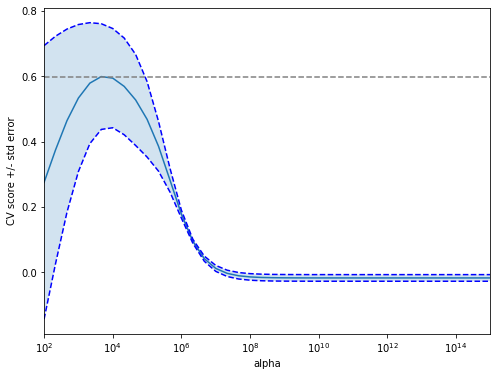

In [64]:
alphas = np.logspace(2, 15, 40)  ## <- larger lambdas are allowed

tuned_parms = [{'alpha': alphas}]
n_folds = 5

ridge = Ridge(random_state=12345, max_iter=130000)
clf = GridSearchCV(ridge, tuned_parms, cv=n_folds, refit=False)
clf.fit(X_scaled_poly_cont_train, Y_train)   
## <= X_scaled_poly_cont_train

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]]);

In [65]:
clf.best_params_['alpha']

4641.588833612777

In [66]:
ridge_poly_cont = Ridge(alpha=clf.best_params_['alpha'])
ridge_poly_cont.fit(X_scaled_poly_cont_train, Y_train)
ridge_poly_cont.score(X_scaled_poly_cont_test, Y_test)

0.864351716298755

## Random Forests - better model to predict the Sale Price



## Randomforests

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)

In [58]:
rf.fit(X_scaled_cont_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
rf.score(X_scaled_cont_test,Y_test)

0.8865582489718629

In [60]:
rf.fit(X_scaled_cat_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
rf.score(X_scaled_cat_test,Y_test)

0.7514126454859785